# Online Retail Analysis
## Purchase Behavior Prediction Using Machine Learning

### Project Overview
- **Objective**: Analyze and predict customer purchase behavior using machine learning
- **Dataset Source**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail)
- **Time Period**: December 2010 - December 2011

### Table of Contents
1. [Environment Setup](#1-environment-setup)
2. [Data Loading and Overview](#2-data-loading-and-overview)
3. [Data Cleaning and Preprocessing](#3-data-cleaning-and-preprocessing)
4. [Exploratory Data Analysis](#4-exploratory-data-analysis)
5. [Feature Engineering](#5-feature-engineering)
6. [Model Building](#6-model-building)
7. [Conclusions](#7-conclusions)

### 1. Environment Setup

In [48]:
### 1. Environment Setup

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import time
warnings.filterwarnings('ignore')

### 2. Data Overview

In [50]:
# Load the dataset
df = pd.read_excel('Online Retail.xlsx')

# Display basic information
print("Dataset Overview:")
print("-" * 50)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumn Information:")
print("-" * 50)
df.info()

Dataset Overview:
--------------------------------------------------
Number of rows: 541909
Number of columns: 8

Column Information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [51]:
# Display first few rows
print("\nFirst few rows of the dataset:")
print("-" * 50)
df.head()


First few rows of the dataset:
--------------------------------------------------


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [52]:
# Display basic statistics
print("\nBasic Statistics:")
print("-" * 50)
df.describe()


Basic Statistics:
--------------------------------------------------


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### 3. Data Cleaning and Preprocessing

In [54]:
### 3. Data Cleaning and Preprocessing

# Function to clean and preprocess data
def clean_data(df):
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # Remove missing values
    df_clean = df_clean.dropna(subset=['CustomerID'])
    
    # Remove cancelled orders (those starting with 'C')
    df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]
    
    # Convert InvoiceDate to datetime
    df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
    
    # Remove invalid quantities and prices
    df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
    
    # Remove duplicates
    df_clean = df_clean.drop_duplicates()
    
    return df_clean

# Clean the data
df_cleaned = clean_data(df)

# Check the cleaning results
print("Data cleaning results:")
print("-" * 50)
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())


Data cleaning results:
--------------------------------------------------
Original dataset shape: (541909, 8)
Cleaned dataset shape: (392692, 8)

Missing values after cleaning:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


### 4. Exploratory Data Analysis

Text(0.5, 0, 'Total Quantity')

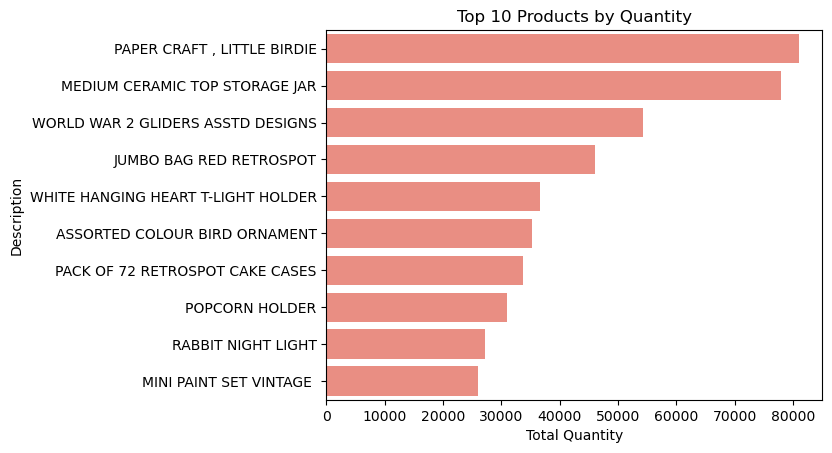

In [56]:
# 1. Top Products
top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, color='salmon')
plt.title('Top 10 Products by Quantity')
plt.xlabel('Total Quantity')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Netherlands'),
  Text(2, 0, 'EIRE'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Sweden')])

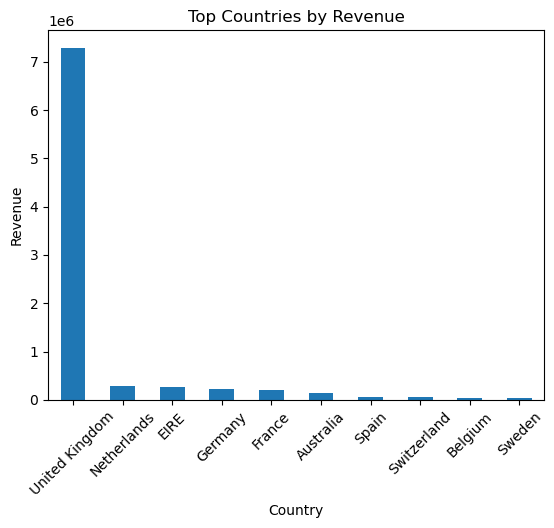

In [57]:
# 2. Sales by Country

# Calculate TotalPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

country_sales = df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar')
plt.title('Top Countries by Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

(array([492]), [Text(492, 0, 'Jan\n2011')])

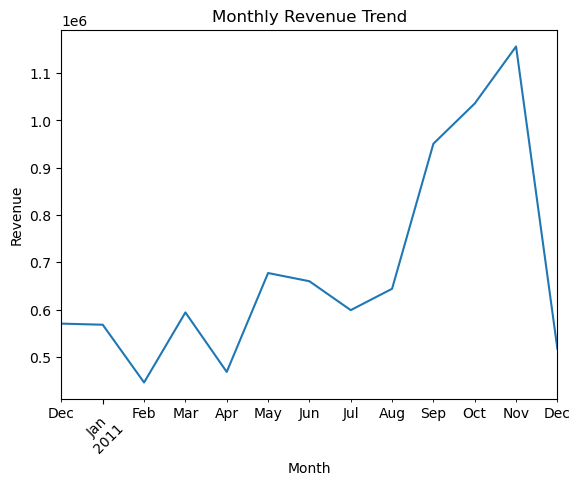

In [58]:
# 3. Monthly Sales Trend
# Calculate TotalPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.to_period('M')
monthly_sales = df_cleaned.groupby('Month')['TotalPrice'].sum()
monthly_sales.plot()
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

Text(0.5, 0, 'Total Spent')

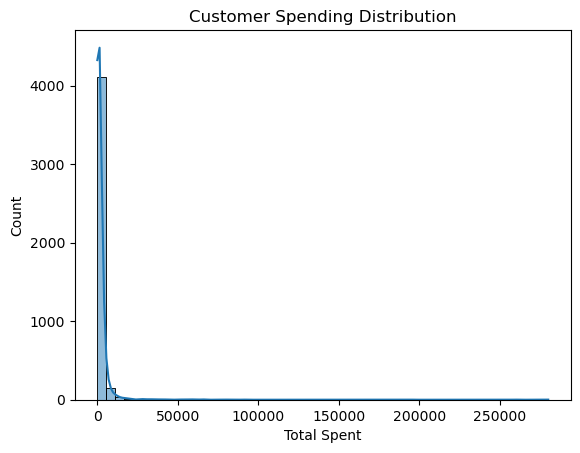

In [59]:
# 4. Customer Spending Distribution

# Calculate TotalPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

customer_sales = df_cleaned.groupby('CustomerID')['TotalPrice'].sum()
sns.histplot(customer_sales, bins=50, kde=True)
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spent')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

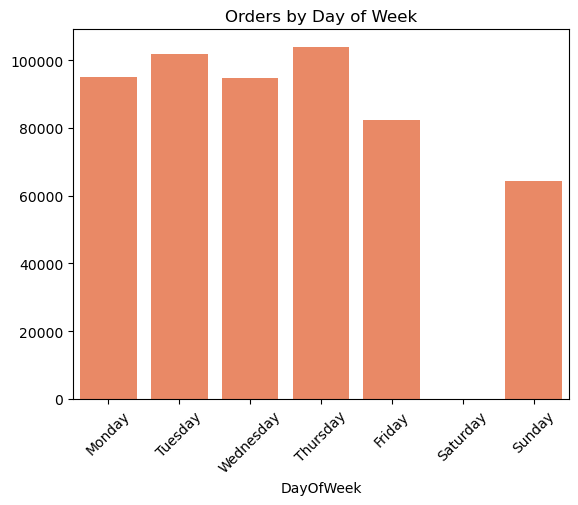

In [60]:
# 5. Time Analysis
# Daily Order Patterns
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_orders = df.groupby('DayOfWeek')['InvoiceNo'].count()
daily_orders = daily_orders.reindex(day_order)
sns.barplot(x=daily_orders.index, y=daily_orders.values,  color='coral')
plt.title('Orders by Day of Week')
plt.xticks(rotation=45)


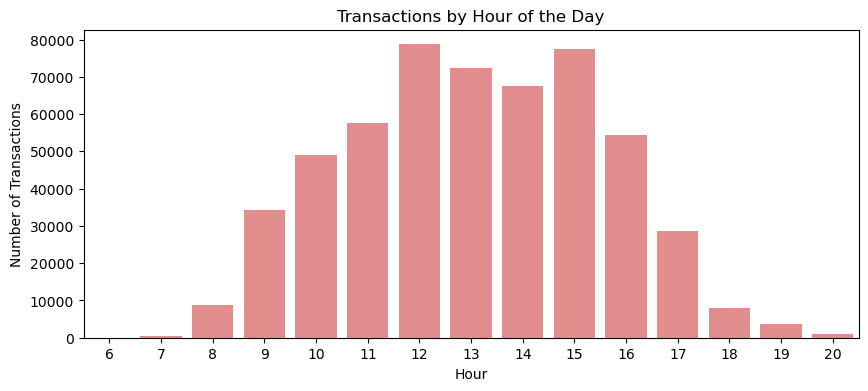

In [61]:
# Hourly Order Patterns
df['Hour'] = df['InvoiceDate'].dt.hour

plt.figure(figsize=(10, 4))
sns.countplot(x='Hour', data=df, color='lightcoral')
plt.title('Transactions by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()

Text(0.5, 1.0, 'Price vs Quantity Relationship')

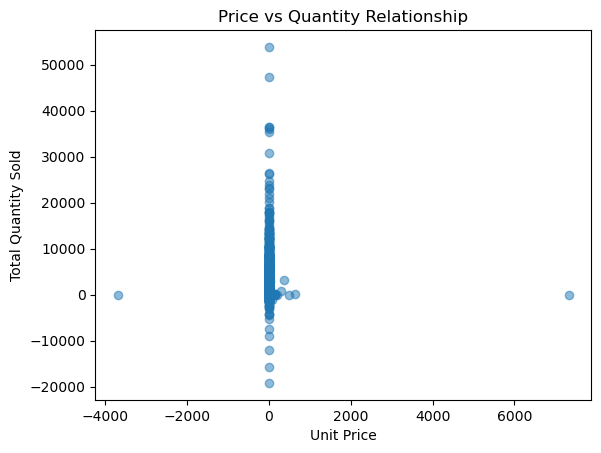

In [62]:
#6. Product Analysis
product_price_quantity = df.groupby('Description').agg({
    'UnitPrice': 'mean',
    'Quantity': 'sum'
}).reset_index()
plt.scatter(product_price_quantity['UnitPrice'], 
            product_price_quantity['Quantity'], 
            alpha=0.5)
plt.xlabel('Unit Price')
plt.ylabel('Total Quantity Sold')
plt.title('Price vs Quantity Relationship')

Text(0.5, 1.0, 'Customer Order Frequency vs Spending')

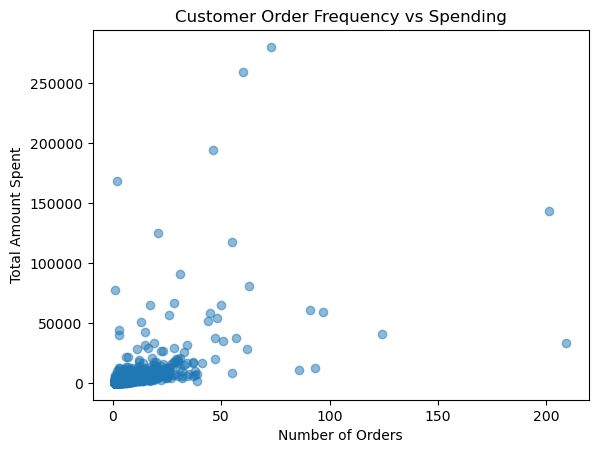

In [63]:
#7. Customer Analysis

# Calculate TotalPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

customer_orders = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique()
customer_total = df_cleaned.groupby('CustomerID')['TotalPrice'].sum()
plt.scatter(customer_orders, customer_total, alpha=0.5)
plt.xlabel('Number of Orders')
plt.ylabel('Total Amount Spent')
plt.title('Customer Order Frequency vs Spending')

Text(0.5, 1.0, 'Top 10 Product Categories by Revenue')

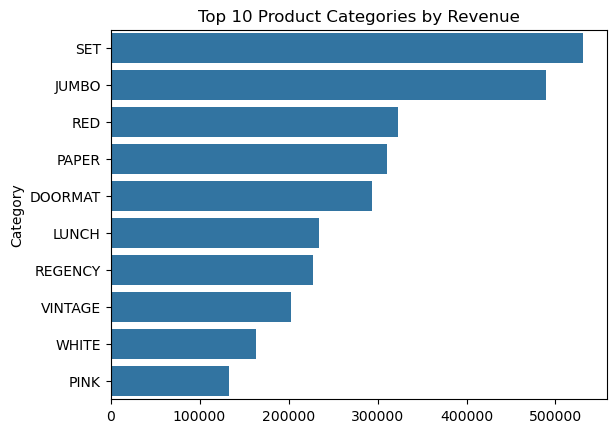

In [64]:
#8. Product Category Analysis (assuming first word is category)

# Calculate TotalPrice
df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

df_cleaned['Category'] = df_cleaned['Description'].str.split().str[0]
category_revenue = df_cleaned.groupby('Category')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=category_revenue.values, y=category_revenue.index)
plt.title('Top 10 Product Categories by Revenue')

### 5. Feature Engineering

In [66]:
### 5. Feature Engineering
def create_features(df):
    # Customer-level features
    customer_features = pd.DataFrame()
    
    # Total amount spent
    customer_features['total_amount'] = df.groupby('CustomerID')['TotalPrice'].sum()
    
    # Number of orders
    customer_features['number_of_orders'] = df.groupby('CustomerID')['InvoiceNo'].nunique()
    
    # Average order value
    customer_features['avg_order_value'] = customer_features['total_amount'] / customer_features['number_of_orders']
    
    # Number of unique products
    customer_features['unique_products'] = df.groupby('CustomerID')['StockCode'].nunique()
    
    # Average quantity per order
    customer_features['avg_quantity'] = df.groupby('CustomerID')['Quantity'].mean()
    
    # Days since first purchase
    customer_features['days_since_first_purchase'] = df.groupby('CustomerID')['InvoiceDate'].agg(lambda x: (x.max() - x.min()).days)
    
    return customer_features

# Create features
features_df = create_features(df_cleaned)

# Create target variable (1 if customer spent above median, 0 otherwise)
median_spent = features_df['total_amount'].median()
features_df['high_value_customer'] = (features_df['total_amount'] > median_spent).astype(int)

print("Feature Engineering Results:")
print("-" * 50)
print(features_df.head())

Feature Engineering Results:
--------------------------------------------------
            total_amount  number_of_orders  avg_order_value  unique_products  \
CustomerID                                                                     
12346.0         77183.60                 1     77183.600000                1   
12347.0          4310.00                 7       615.714286              103   
12348.0          1797.24                 4       449.310000               22   
12349.0          1757.55                 1      1757.550000               73   
12350.0           334.40                 1       334.400000               17   

            avg_quantity  days_since_first_purchase  high_value_customer  
CustomerID                                                                
12346.0     74215.000000                          0                    1  
12347.0        13.505495                        365                    1  
12348.0        75.516129                        282        

### 6. Model Building

In [96]:
## Understanding the features dataset
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_amount               4338 non-null   float64
 1   number_of_orders           4338 non-null   int64  
 2   avg_order_value            4338 non-null   float64
 3   unique_products            4338 non-null   int64  
 4   avg_quantity               4338 non-null   float64
 5   days_since_first_purchase  4338 non-null   int64  
 6   high_value_customer        4338 non-null   int32  
dtypes: float64(3), int32(1), int64(3)
memory usage: 254.2 KB


In [98]:
# Display first few rows
print("\nFirst few rows of the features dataset:")
print("-" * 50)
features_df.head()


First few rows of the features dataset:
--------------------------------------------------


,total_amount,number_of_orders,avg_order_value,unique_products,avg_quantity,days_since_first_purchase,high_value_customer
CustomerID,,,,,,,
12346.0,77183.60,1,77183.600000,1,74215.000000,0,1
12347.0,4310.00,7,615.714286,103,13.505495,365,1
12348.0,1797.24,4,449.310000,22,75.516129,282,1
12349.0,1757.55,1,1757.550000,73,8.643836,0,1
12350.0,334.40,1,334.400000,17,11.588235,0,0


In [100]:
# We are identify the high_value_customer, So we need to remove the rows that are assosicated with high_value_customer.
# total_amount this field is removed because, we used this for defining the high_value_customer
# we also removing the avg_order_value field, because this has relation with total_amount
def prepare_model_data(features_df):
    # Separate features and target
    X = features_df.drop(['high_value_customer', 'total_amount', 'avg_order_value'], axis=1)
    y = features_df['high_value_customer']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# Prepare data for modeling
X_train_scaled, X_test_scaled, y_train, y_test = prepare_model_data(features_df)

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Dictionary to store models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'KNN': KNeighborsClassifier()
    }
    
    # Dictionary to store results
    results = []
    
    for name, model in models.items():
        start_time = time.time()
        
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        
        # Calculate training time
        training_time = time.time() - start_time
        
        # Store results
        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Training Time': training_time
        })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df, models

# Train and evaluate all models
results_df, trained_models = train_and_evaluate_models(X_train_scaled, X_test_scaled, y_train, y_test)

Model Comparison Results:
----------------------------------------------------------------------------------------------------
                 Model  Accuracy  Precision  Recall  F1 Score  Training Time
0  Logistic Regression    0.8341     0.8635  0.7963    0.8286         0.0357
1        Decision Tree    0.8871     0.8988  0.8741    0.8863         0.0341
2        Random Forest    0.9055     0.9138  0.8970    0.9053         0.6398
3    Gradient Boosting    0.9147     0.9251  0.9039    0.9144         0.5249
4                  KNN    0.8548     0.8659  0.8421    0.8538         0.0647


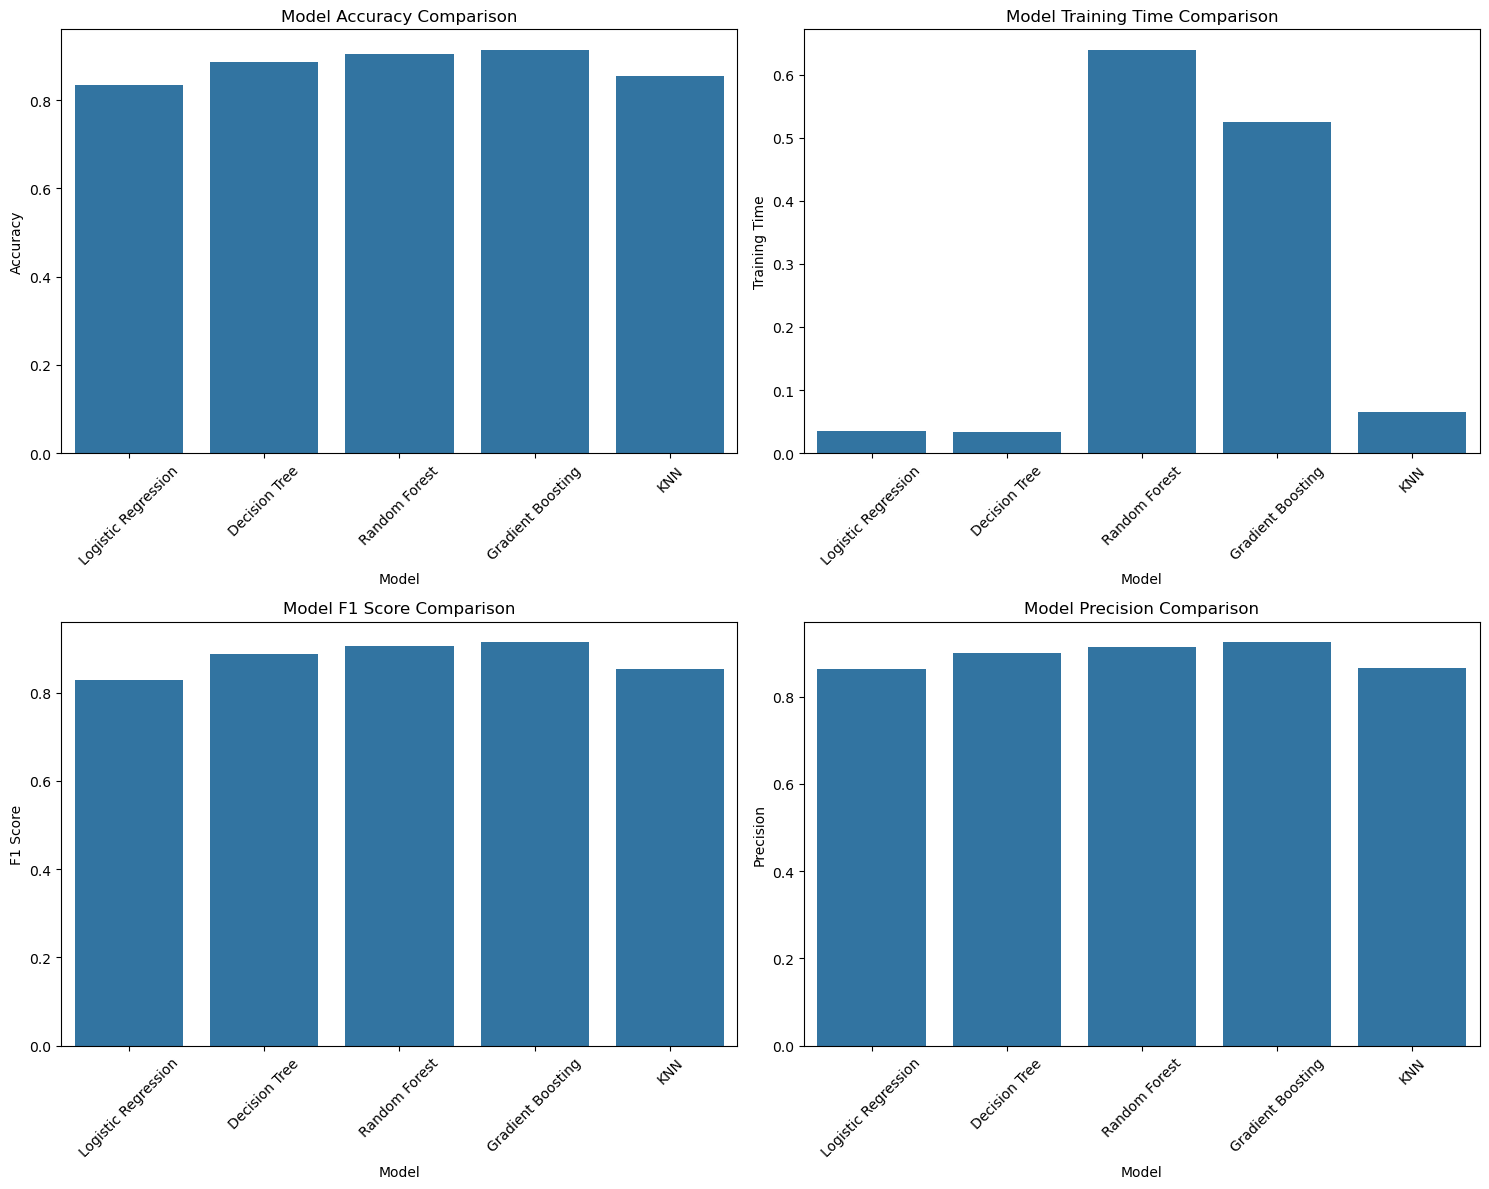


Best performing model: Gradient Boosting

Detailed performance metrics for best model:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       431
           1       0.93      0.90      0.91       437

    accuracy                           0.91       868
   macro avg       0.91      0.91      0.91       868
weighted avg       0.91      0.91      0.91       868



In [71]:
# Display results
print("Model Comparison Results:")
print("-" * 100)
print(results_df.round(4))

# Visualize model comparison
def plot_model_comparison(results_df):
    # Set up the plotting area
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot accuracy comparison
    sns.barplot(x='Model', y='Accuracy', data=results_df, ax=axes[0,0])
    axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45)
    axes[0,0].set_title('Model Accuracy Comparison')
    
    # Plot training time comparison
    sns.barplot(x='Model', y='Training Time', data=results_df, ax=axes[0,1])
    axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45)
    axes[0,1].set_title('Model Training Time Comparison')
    
    # Plot F1 Score comparison
    sns.barplot(x='Model', y='F1 Score', data=results_df, ax=axes[1,0])
    axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45)
    axes[1,0].set_title('Model F1 Score Comparison')
    
    # Plot Precision comparison
    sns.barplot(x='Model', y='Precision', data=results_df, ax=axes[1,1])
    axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45)
    axes[1,1].set_title('Model Precision Comparison')
    
    plt.tight_layout()
    plt.show()

# Plot model comparison
plot_model_comparison(results_df)

# Find best model
best_model_name = results_df.loc[results_df['F1 Score'].idxmax(), 'Model']
best_model = trained_models[best_model_name]

print(f"\nBest performing model: {best_model_name}")
print("\nDetailed performance metrics for best model:")
y_pred_best = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best))

### 7. Conclusions

In [73]:
### 7. Conclusions
def print_conclusions():
    print("Analysis Conclusions:")
    print("-" * 50)
    print("1. Data Quality and Preprocessing:")
    print("   - Successfully cleaned and preprocessed the dataset")
    print("   - Handled missing values, duplicates, and invalid entries")
    
    print("\n2. Customer Behavior Insights:")
    print("   - Identified peak shopping hours and days")
    print("   - Analyzed product price-quantity relationships")
    print("   - Mapped customer order frequency to spending patterns")
    print("   - Discovered geographic revenue distribution")
    
    print("\n3. Model Performance:")
    print("   - Compared multiple machine learning models")
    print(f"   - Best performing model: {best_model_name}")

# Print enhanced conclusions
print_conclusions()

Analysis Conclusions:
--------------------------------------------------
1. Data Quality and Preprocessing:
   - Successfully cleaned and preprocessed the dataset
   - Handled missing values, duplicates, and invalid entries

2. Customer Behavior Insights:
   - Identified peak shopping hours and days
   - Analyzed product price-quantity relationships
   - Mapped customer order frequency to spending patterns
   - Discovered geographic revenue distribution

3. Model Performance:
   - Compared multiple machine learning models
   - Best performing model: Gradient Boosting
